In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os

import sys
sys.path.insert(0, '..')
from module import carrington, toSunpyMap

# Carrington sunmap

In [6]:
folder = '../data/carrington_test_data/'

carrington_list = []
for filename in os.listdir(folder):
    carrington_list.append(carrington(folder + filename, flat=True).data)

In [7]:
img = np.full(carrington_list[0].data.shape, np.nan)

img = np.nanmin(carrington_list, axis=0)

C:\Users\lherrington\AppData\Local\Temp\ipykernel_10732\3646129219.py:3: RuntimeWarning: All-NaN axis encountered
  img = np.nanmin(carrington_list, axis=0)


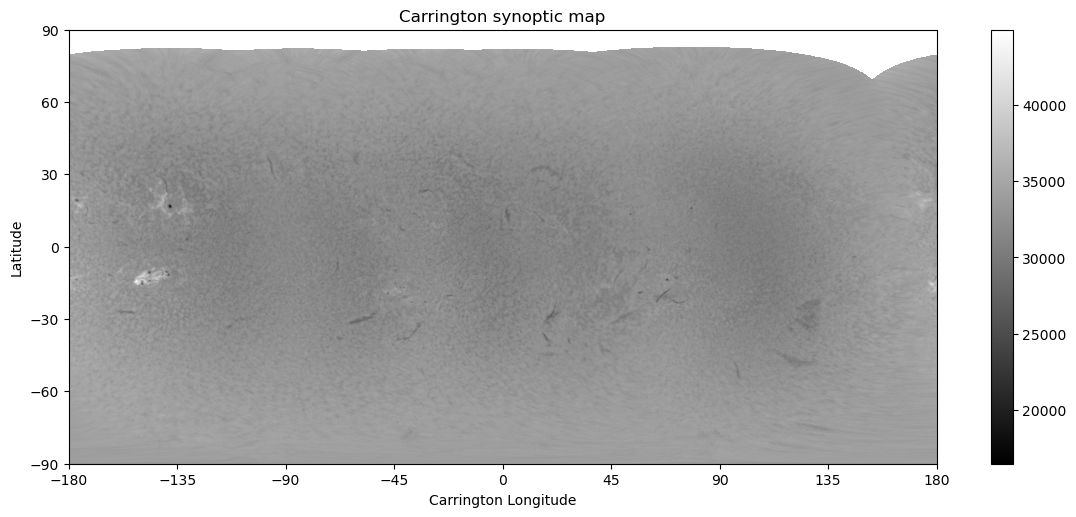

In [10]:
plt.figure(figsize=(14,14))

im = plt.imshow(img, cmap='grey', origin='lower', extent=[-180,180,-90,90])

plt.colorbar(im, shrink=0.403)

 
plt.xticks(np.arange(-180, 181, 45))
plt.yticks(np.arange(-90, 91, 30))
 
plt.axis()

plt.xlabel('Carrington Longitude');
plt.ylabel('Latitude');

plt.title('Carrington synoptic map');